# Le Perceptron
**Le plus simple des réseaux de neurones :** 

    * une couche d'entrée

    * une couche de sortie
    
    * pas de couche cachée

=============================================================

**Olivier Thöni, IFUCOME - UCO faculté d'Éducation - Angers**

D'après Nagesh Singh Chauhan, Data Scientist chez Cirruslab

=============================================================

## Préambule

Nous allons créer Réseau de Neurones Artificiel (*ANN*) à partir de rien en utilisant uniquement la   bibliothèque *numpy* de Python.


Dans cette partie-1, nous allons construire l'ANN le plus simple qui soit, avec juste 1 couche d'entrée et 1 couche de sortie et aucune couche cachée.


**Pourquoi partir de rien ?**


De nombreuses bibliothèques d’apprentissage profond ( *Keras* ,  *TensorFlow* ,  *PyTorch*,  etc.) peuvent être utilisées pour créer un réseau de neurones en quelques lignes de code. Cependant, si on veut vraiment comprendre le fonctionnement profond d'un réseau de neurones, il vaut mieux apprendre à le coder à partir de zéro en utilisant Python ou tout autre langage de programmation... Alors, commençons.



**Étapes à suivre :**
1. Définir les variables indépendantes et la variable dépendante.
2. Définir les hyperparamètres.
3. Définir la fonction d'activation et sa dérivée.
4. Entraîner le modèle

5. Faire des prédictions.

## Théorie de l'ANN


Un réseau neuronal artificiel est un algorithme d'**apprentissage supervisé**, ce qui signifie que nous lui fournissons les données d'entrée contenant les variables indépendantes et les données de sortie contenant la variable dépendante. Par exemple, dans notre exemple, nos variables indépendantes sont, en entrées,  X1, X2 and X3. La variable dépendante, en sortie, est  Y.

Au début, l'ANN fait des prédictions aléatoires, ces prédictions sont comparées avec la sortie correcte et l'erreur (la différence entre les valeurs prédites et les valeurs réelles) est calculée. 

La fonction qui trouve la différence entre la valeur réelle et les valeurs propagées est appelée la **fonction de coût**. Le coût ici fait référence à l'erreur. Notre objectif est de minimiser la fonction de coût. Former un réseau de neurones consiste essentiellement à minimiser la fonction de coût. Nous verrons comment nous pouvons accomplir cette tâche.

Un réseau de neurones s'exécute en deux phases: les phases  ***Feed Forward*** (entraînement)  et  ***Back Propagation*** (rétro-propagation de l'erreur) .

Voyons cela...

### *Feed Forward*

<img src="https://miro.medium.com/max/913/0*Olb_5k6mHbrZqEzn.png"
     alt="Perceptron"
     style="float: left; margin-right: 10px;" 
     width = 400 />

Dans la phase de feed-forward de l'ANN, les prédictions sont établies sur la base des valeurs dans les nœuds d'entrée et des pondérations. Si vous regardez le perceptron dans la figure ci-dessus, vous verrez que le jeu de données contient trois entités ("*features*"): X1, X2 et X3. Par conséquent, nous avons trois nœuds dans la première couche, également appelée **couche d'entrée**.

Les **poids** d'un réseau de neurones sont essentiellement les coefficients que nous devons ajuster afin de pouvoir prédire correctement notre sortie. Pour l'instant, rappelez-vous que pour chaque fonction d'entrée, nous avons un poids.

Voici les étapes qui s'exécutent pendant la phase d'entraînement du réseau :

* **Étape 1 : Calculez le produit scalaire entre les entrées et les poids**

Les nœuds de la couche d'entrée sont connectés à la couche de sortie via trois paramètres de pondération. Dans la couche en sortie, les valeurs des nœuds en entrée sont multipliées par leurs poids correspondants et sont additionnées. Enfin, le terme de biais  b est ajouté à la somme.

Pourquoi avons-nous besoin d'un terme de biais?

Supposons que si nous avons une personne qui a des valeurs d'entrée (0,0,0), la somme des produits des noeuds et des poids d'entrée sera égale à zéro. Dans ce cas, le résultat sera toujours égal à zéro, quel que soit le temps d'apprentissage des algorithmes. Par conséquent, pour pouvoir faire des prédictions, même si nous ne disposons pas d'informations non nulles sur la personne, nous avons besoin d'un terme de biais. Le terme de biais est nécessaire pour créer un réseau de neurones robuste.

Mathématiquement, le produit scalaire, avec le biais, s'écrit :

z = X.W =x1.w1 + x2.w2 + x3.w3 + b

* **Étape 2 : Passez la somme des produits scalaires (XW) via une fonction d'activation**

Le produit scalaire z ci-dessus peut produire n’importe quel genre de valeurs. Cependant, dans nos entrées, nous avons les valeurs sous la forme de 1 et de 0. Nous voulons que notre sortie soit dans le même format. Pour ce faire, nous avons besoin d’une **fonction d’activation** , qui limite, en fonction de z, les valeurs d’entrée à 0 et 1. Cette fonction s'appelle une **Sigmoïde**

<img src="https://miro.medium.com/max/485/0*lZTAMCLhGtlPusTg.png"
     alt="Sigmoïde"
     style="float: left; margin-right: 10px;" 
     width = 400 />

La fonction sigmoïde renvoie 0,5 lorsque l'entrée est 0. Elle renvoie une valeur proche de 1 si l'entrée est un grand nombre positif. En cas d'entrée négative, la fonction sigmoïde fournit une valeur proche de zéro.

Par conséquent, elle est particulièrement adaptée pour les modèles dans lesquels nous devons prédire une probabilité en sortie. Comme la probabilité est un nombre compris entre  0 et 1, la sigmoïde est le bon choix pour notre problème.


Résumons ce que nous avons fait jusqu’à présent. Tout d'abord, nous devons trouver le produit scalaire des entités en entrée (matrice de variables indépendantes) avec les pondérations, ensuite, passer la somme des produits scalaires via une fonction d’activation. Le résultat de la fonction d'activation est essentiellement la sortie prévue pour les entités en entrée.

 

### *Back Propagation* (retro-progagation)
 
Au début, avant que vous l'entraîniez, le réseau de neurones fait des prédictions aléatoires, qui sont bien sûr incorrectes.
Nous commençons par laisser le réseau faire des prédictions de sortie aléatoires. Nous comparons ensuite la sortie prévue du réseau de neurones avec la sortie réelle. Ensuite, nous mettons à jour les pondérations et les biais de manière à ce que notre production prévue se rapproche de la production réelle. Dans cette phase, nous formons notre algorithme. Regardons les étapes de la phase de rétro-propagation.

* **Étape 1 : calcul du coût (*loss* en anglais)**

La première étape de cette phase consiste à déterminer le "coût" des prévisions. Le coût de la prévision peut être calculé en calculant la différence entre les valeurs de sortie prévues et les valeurs de sortie réelles. Si la différence est importante, le coût le sera également.

Nous utiliserons l'erreur quadratique moyenne (ou la fonction de coût MSE : *"Mean Squarred Error"*). Une fonction de coût est une fonction qui trouve le coût des prédictions de sortie données.

<img src="https://miro.medium.com/max/581/0*DGjzN-ppsTBxYsFp.png"
     alt="Fonction de coût"
     style="float: left; margin-right: 10px;" 
     width = 200 />

Yi désigne la valeur réelle de la sortie, Ŷi, la valeur prédite, et n le nombre d'observations.
Le carré de la différence est du type d'une distance (Pythagore, ça vous parle ?) : on étudie la proximité entre la prédiction et le réel.

* **Étape 2 : minimisation des coûts**

Notre objectif ultime est d’ajuster les poids de notre réseau de neurones de manière à minimiser les coûts. Si vous observez attentivement, vous saurez que nous ne pouvons contrôler que les poids et le biais. Tout le reste est hors de notre contrôle. Nous ne pouvons pas contrôler les entrées, nous ne pouvons pas contrôler les produits scalaires et nous ne pouvons pas manipuler la fonction sigmoïde.

Afin de minimiser le coût, nous devons trouver les valeurs de pondération et de biais pour lesquelles la fonction de coût renvoie la valeur la plus petite possible. Plus le coût est faible, plus nos prévisions sont correctes.

Pour trouver les minima d'une fonction, nous pouvons utiliser l'algorithme de **descente de gradient**. La descente de gradient consiste à mettre à jour les poids, elle peut être représentée mathématiquement par:

<img src="https://miro.medium.com/max/414/0*RpdL_oGbesW7sQhF.png"
     alt="Mise à jour des poids par la descente de gradient"
     style="float: left; margin-right: 10px;" 
     width = 300 />

**𝛛Error**  est la fonction de coût. L'équation ci-dessus nous dit de trouver la dérivée partielle de la fonction de coût pour chaque pondération et biais et soustraire le résultat des pondérations existantes pour obtenir de nouvelles pondérations.

La dérivée d'une fonction nous donne sa pente en un point donné. Pour déterminer si le coût augmente ou diminue, en fonction de la valeur de poids, nous pouvons trouver la dérivée de la fonction à cette valeur de poids particulière. Si le coût augmente en même temps que la pondération, le nombre dérivé aura une valeur positive qui sera ensuite soustraite de la valeur existante.

D'autre part, si le coût diminue avec une augmentation de poids, une valeur négative sera renvoyée, qui sera ajoutée à la valeur de poids existante, puisque négatif par négatif est positif.

Dans l'équation ci-dessus,  "a" est appelé le **taux d'apprentissage**, qui est multiplié par la dérivée. Le taux d'apprentissage détermine la vitesse d'apprentissage de notre algorithme : trop faible, le processus s'améliorera trop lentement, trop fort, on risque d'osciller autour de la valeur optimale.

Nous devons répéter l'exécution de la descente de gradient pour tous les poids et biais jusqu'à ce que le coût soit minimisé (la fonction de coût renvoie une valeur proche de zéro).

Le moment est venu d'appliquer ce que nous avons étudié jusqu'à présent. Nous allons créer un réseau neuronal simple avec une couche d'entrée et une couche de sortie en Python.

### Mise en oeuvre de réseaux de neurones artificiels à l’aide de *numpy* :

* **Étape 1: création des variables**

Créons d’abord nos variables indépendantes ou notre ensemble d’entités en entrée et la variable dépendante ou les étiquettes correspondantes.

 

In [1]:
import numpy as np

# Variables indépendantes (entrée)
# 7 individus, dont 3 variables sont mesurées (oui : 1, non : 0)
# ex : homme ? + de 50 ans ? aisé ?
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,0,1],
                      [0,0,0]])

# Variable dépendante (sortie)
# ex : achète la bouteille ?
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    0]])

labels = labels.reshape(7,1) # pour convertir la variable labels en vecteur

Notre ensemble d'entrées contient sept enregistrements. De même, nous avons également créé un "labels", ensemble contenant les étiquettes correspondantes pour chaque enregistrement du jeu d’entrée. Les étiquettes sont les valeurs que nous voulons que notre ANN prédise.

* **Étape 2: Définir les hyperparamètres**

Nous allons utiliser (ou pas, si la ligne est commentée...) la  fonction *random.seed* de numpy pour pouvoir obtenir les mêmes valeurs aléatoires à chaque exécution du code ci-dessous !

Ensuite, nous initialisons nos poids avec des nombres aléatoires uniformément distribués dans [0,1]. Comme nous avons trois entités en entrée, nous avons un vecteur de trois poids. Nous initialisons ensuite la valeur de biais avec un autre nombre aléatoire. Enfin, nous avons défini le taux d’apprentissage à 0,05.

In [2]:
#np.random.seed (42) # initialisation du hasard toujours pareil si non commenté
poids = np.random.rand (3,1) 
biais = np.random.rand (1) 
lr = 0.5 # Taux d’apprentissage

print('poids initiaux : '  + str(poids[0])+','+str(poids[1])+','+str(poids[2])+'     biais initial : '+str(biais))

#z_0 = input_set[0][0]*poids[0] + input_set[0][1]*poids[1]+ input_set[0][2]*poids[2]+ biais[0]
#print('Produit scalaire + biais pour le 1er individu : (' + str(input_set[0])+') : ' + str(z_0))
z_0 = np.dot(input_set,poids) + biais
print(z_0)

poids initiaux : [0.35931127],[0.47157123],[0.71451933]     biais initial : [0.8605269]
[[1.33209813]
 [1.57504622]
 [1.21983816]
 [1.6914094 ]
 [2.40592872]
 [1.57504622]
 [0.8605269 ]]


* **Étape 3: Définir la fonction d'activation et sa dérivée :**

Notre fonction d'activation est la fonction sigmoïde.

In [3]:
def sigmoid (x): 
    return 1 / (1 + np.exp (-x))

In [4]:
# activation pour les 7 individus avec poids et biais de départ ?
print(sigmoid(z_0))
print(labels)
print('Pas de jaloux, tout le monde est activé...')

[[0.79118748]
 [0.8285018 ]
 [0.77203507]
 [0.84440942]
 [0.91727828]
 [0.8285018 ]
 [0.70277073]]
[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
Pas de jaloux, tout le monde est activé...


Définissons maintenant une fonction qui calcule la dérivée de la fonction sigmoïde.

In [5]:
def sigmoid_derivative (x): 
    return sigmoid (x) * (1-sigmoid (x))

* **Étape 4: Il est temps de former notre modèle ANN**

Nous commencerons par définir le nombre d'**époques**. Une époque correspond au nombre de fois que nous souhaitons entraîner l'algorithme sur notre jeu de données. 

Nous entraînerons l'algorithme sur nos données 3 000 fois, de sorte que notre époque sera de 3 000. Vous pouvez essayer un nombre différent pour réduire davantage le coût.

In [6]:
loss = []
epochs = 100
for epoque in range(epochs):
    inputs = input_set
    XW = np.dot(inputs, poids) + biais # produit scalaire entrées.poids + biais
    z = sigmoid(XW) # activation ou non du neurone
    erreur = z - labels
    loss.append(erreur.sum())
    
    dcost = erreur
    dpred = sigmoid_derivative(z)
    z_del = dcost * dpred
    
    inputs = input_set.T
    poids = poids - lr * np.dot (inputs, z_del)
    
    for num in z_del:
        biais = biais - lr*num

    if epoque%50 == 0:
        print('époque ' + str(epoque) + ' : '+str(erreur.sum())+ '    poids : ' + str(poids[0])+','+str(poids[1])+','+str(poids[2])+'     biais : '+str(biais))
  
print('époque ' + str(epoque) + ' : loss : '+str(erreur.sum())+ '    poids : ' + str(poids[0])+','+str(poids[1])+','+str(poids[2])+'     biais : '+str(biais))

époque 0 : 2.6846845706112967    poids : [0.30066363],[0.51877256],[0.54767138]     biais : [0.57116799]
époque 50 : 0.094391817519883    poids : [0.48601292],[3.87210044],[-0.64429717]     biais : [-1.95354348]
époque 99 : loss : 0.044759936918146316    poids : [0.49052807],[5.2056958],[-0.68201619]     biais : [-2.62752526]


Observons l'évolution de la loss au cours de ces 100 époques :

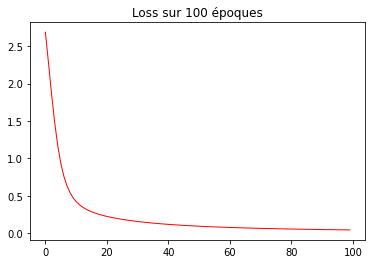

In [7]:
import matplotlib.pyplot as plt
xx = range(epochs)
yy = loss
p1 = plt.plot(xx,yy,'r',linewidth=1)

titre = ('Loss sur '+ str(epochs)+' époques')
plt.title(titre)

plt.show()


On constate qu'après à peine plus de 50 époques, on tombe sous un taux de 1% d'erreur...

* **Étape 5: Faire des prédictions**

Il est temps de faire des prédictions. Essayons avec [1,0,0] (Cette donnée a déjà été présentée au réseau lors de la phase d'entraînement, ce qui augmente, fort heuresement les chances que la prédiction soit correcte.)

In [8]:
single_pt = np.array ([1,0,0]) # homme, - de 50 ans, pas aisé
resultat = sigmoid (np.dot (single_pt, poids) + biais) 
print (resultat)
if resultat < 0.5 :
    print('Prédiction négative')
else :
    print('Prédiction positive')

[0.10555255]
Prédiction négative


Comme vous pouvez le constater, la sortie est plus proche de 0 que de 1, elle est donc classée comme 0.

Essayons encore avec [0,1,0] (là encore, la donnée a déjà été présentée au réseau)

In [9]:
single_pt = np.array ([0,1,0]) # femme, + de 50 ans, pas aisée
resultat = sigmoid (np.dot (single_pt, poids) + biais) 
print (resultat)
if resultat < 0.5 :
    print('Prédiction négative')
else :
    print('Prédiction positive')

[0.92944339]
Prédiction positive


Présentons maintenant la seule donnée (à trois variables O ou 1) qui n'ait pas été présentée au réseau : [1,0,1]. La prédiction pour cette donnée devrait être négative (au fait, avez-vous deviné pourquoi ? Comment sont faites les prédictions, en fait ?)

In [10]:
single_pt = np.array ([1,0,1]) # homme, - de 50 ans, aisé
resultat = sigmoid (np.dot (single_pt, poids) + biais) 
print (resultat)
if resultat < 0.5 :
    print('Prédiction négative')
else :
    print('Prédiction positive')

[0.05630533]
Prédiction négative


## Conclusion
 
Dans ce notebook, nous avons appris à créer un réseau de neurones artificiels très simple avec une couche d'entrée et une couche de sortie à partir de zéro en utilisant la bibliothèque *numpy* python, grâce à la méthode de **descente de gradient**. Cette ANN est capable de classer des données séparables linéairement.

Et si nous avons des données non linéairement séparées, notre ANN ne sera pas en mesure de classer ce type de données. Pour cela, il faudra empiler plusieurs couches (*layers*) de neurones, mais le principe restera toujours le même : une couche d'entrée, des poids, une fonction d'activation et une couche de sortie, qui devient couche d'entrée pour le neurone suivant si la fonction d'activation l'a jugé opportun... C'est tout... mais c'est déjà génial !

**Complément :**
Maintenant, au lieu que le résultat attendu soit la valeur de la 2<sup>ème</sup> colonne, si on décide que cette sortie vaut 1 si la somme des trois critères est égale à 2, 0 sinon, que va donner votre modèle ? Pourquoi ?